<a href="https://colab.research.google.com/github/karthi219ms/TensorFlow/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

# Imports

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


# Data Set

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

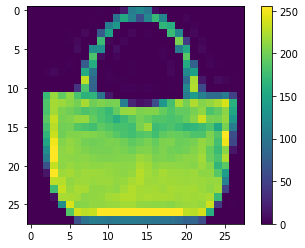

In [10]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Processing

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Building a Model

In [12]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    #Flattern converts  matrix to row matrix for input
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

# Compile the Model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#what we are doing is hyper parameter change

# Training the Model



In [15]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4987 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2925 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

#Evaluating the Model

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8826
Test accuracy: 0.8826000094413757


# Making Prediction

[1.9867473e-07 1.9012306e-10 1.2088641e-07 2.1270257e-09 2.1272935e-07
 3.4396720e-04 1.6574671e-06 8.6236186e-02 2.5361796e-08 9.1341770e-01]
9
Dress


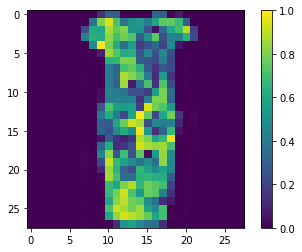

In [25]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[100])])

plt.figure()
plt.imshow(test_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

#Verifying Predictions

Pick a number: 100


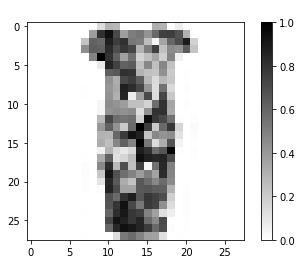

In [27]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)